Erro quadrático médio: 107460.83653127102
R^2: -0.3508867326135745


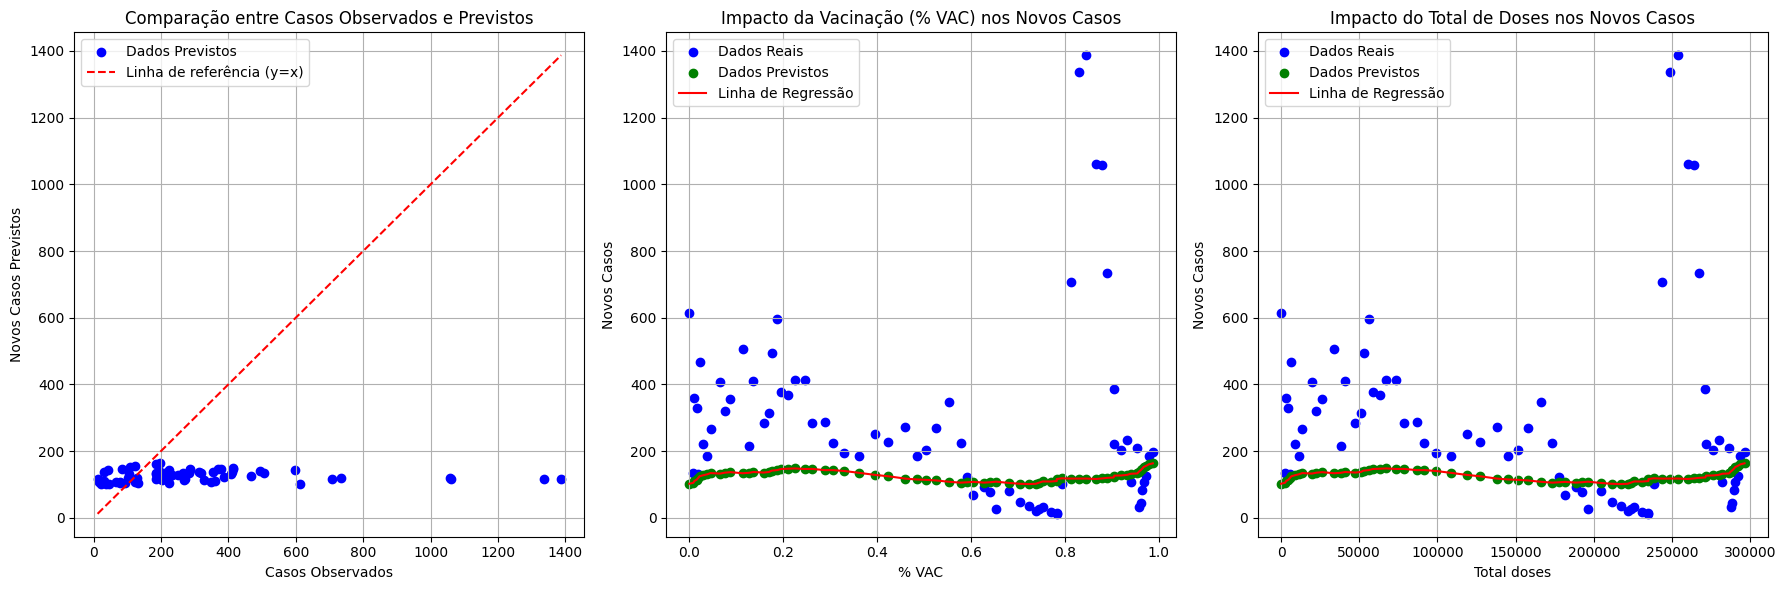

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('G:\Python\Avaliação Final\Covid19_Res.csv')

df['Semana'] = df['Semana'].apply(lambda x: int(x.split('/')[0]) + (int(x.split('/')[1]) - 2020) * 52)

X = df[['Semana', '% VAC', 'Total doses']].values
y = df['NovosCasos'].values

X = np.c_[np.ones(X.shape[0]), X]

XtX = np.dot(X.T, X)
XtX_inversa = np.linalg.inv(XtX)
XtY = np.dot(X.T, y)
beta = np.dot(XtX_inversa, XtY)

y_previstos = np.dot(X, beta)

mse = np.mean((y - y_previstos) ** 2)
r2 = 1 - (np.sum((y - y_previstos) ** 2) / np.sum((y - np.mean(y)) ** 2))

print(f'Erro quadrático médio: {mse}')
print(f'R^2: {r2}')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(y, y_previstos, color='blue', label='Dados Previstos')
axs[0].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Linha de referência (y=x)')
axs[0].set_xlabel('Casos Observados')
axs[0].set_ylabel('Novos Casos Previstos')
axs[0].set_title('Comparação entre Casos Observados e Previstos')
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(df['% VAC'], y, color='blue', label='Dados Reais')
axs[1].scatter(df['% VAC'], y_previstos, color='green', label='Dados Previstos')
axs[1].plot(df['% VAC'], y_previstos, color='red', label='Linha de Regressão')
axs[1].set_xlabel('% VAC')
axs[1].set_ylabel('Novos Casos')
axs[1].set_title('Impacto da Vacinação (% VAC) nos Novos Casos')
axs[1].legend()
axs[1].grid(True)

axs[2].scatter(df['Total doses'], y, color='blue', label='Dados Reais')
axs[2].scatter(df['Total doses'], y_previstos, color='green', label='Dados Previstos')
axs[2].plot(df['Total doses'], y_previstos, color='red', label='Linha de Regressão')
axs[2].set_xlabel('Total doses')
axs[2].set_ylabel('Novos Casos')
axs[2].set_title('Impacto do Total de Doses nos Novos Casos')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


# Análise e Interpretação dos Gráficos

* Gráfico Comparação Casos Observados e Previstos

     Grande parte dos pontos concentra em valores baixos, portanto a linha de referência indica grande discrepância.

* Gráfico do Impacto da Vacinação

     Este gráfico já leva em conta a porcentagem vacinada, então é observado a relação da porcentagem de vacinados e os novos casos que indica ser estável, com uma leve queda quando a vacinaçãio aumenta. Observando a linha de regressão que permanece praticamente plana indica que o impacto da vacinação é pequeno. O pico dos novos casos observado no final do gráfico indica que á outros fatores além da vacinação, que podem estar influênciando o aumento.

* Gráfico do Toral de Doses

     Praticamente igual ao gráfico de porcentagem de vacinação então não apresenta relação aparente com os novos casos.

## Conclusão

* Como foi utilizado o modelo de regressão linear simples é observado que não se é capturado bem a variação dos novos casos, pensei em talvez reduzir a análise á uma amostra de 80% mas preferi continuar com a totalidade dos dados fornecidos. Já o impacto da vacinação e do total de doses demonstrou ser limitado pela linha de regressão praticamente plana, indicando uma relação mais complexa do que fornecida nos dados.

* Concluindo a importância de outros fatores para que aja uma análise mais detalhada e melhor previsão dos casos.  

### Aluno: Marco Ryan Marassi Marques